In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Load Decision Tree bundle (adjust path if your notebook is elsewhere)
bundle_path = "../../Results/Visualizations/knn_bundle.pkl"

with open(bundle_path, "rb") as f:
    knn_bundle = pickle.load(f)

print("Loaded bundle keys:", knn_bundle.keys())

Loaded bundle keys: dict_keys(['model_name', 'y_test', 'y_pred', 'y_proba', 'confusion_matrix', 'accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'log_loss', 'roc_auc_ovr', 'params', 'feature_names', 'X_test_sample', 'subsample_fraction', 'val_f1_p1', 'val_f1_p2', 'best_params_p1', 'best_score_p1', 'best_params_p2', 'best_score_p2', 'cv_results_p1', 'cv_results_p2', 'k_values', 'knn_p1_model', 'knn_p2_model'])


### Plot 1: Confusion Matrix (KNN)

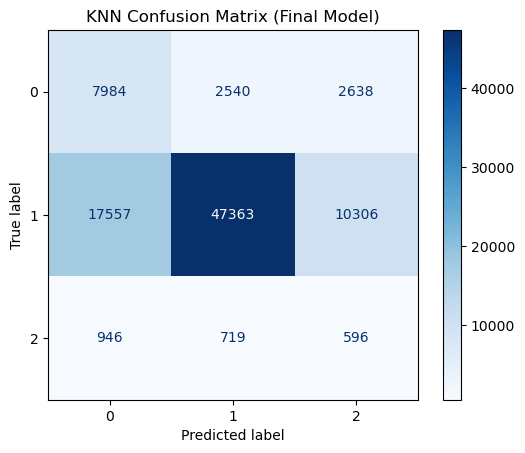

In [2]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = knn_bundle["confusion_matrix"]

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("KNN Confusion Matrix (Final Model)")
plt.show()

### Plot 2: ROC Curve (KNN)

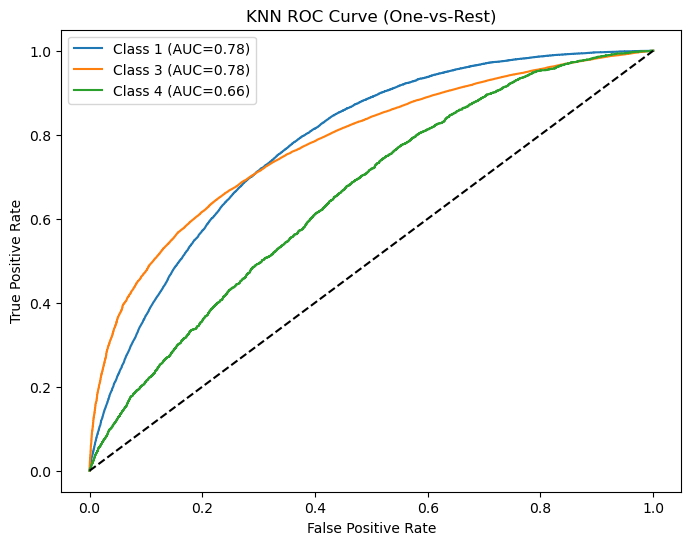

In [3]:
# ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

y_test = knn_bundle["y_test"]
y_proba = knn_bundle["y_proba"]

# Binarize
classes = np.unique(y_test)
y_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8,6))

for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()

### Plot 3: Precision–Recall Curve (per class)

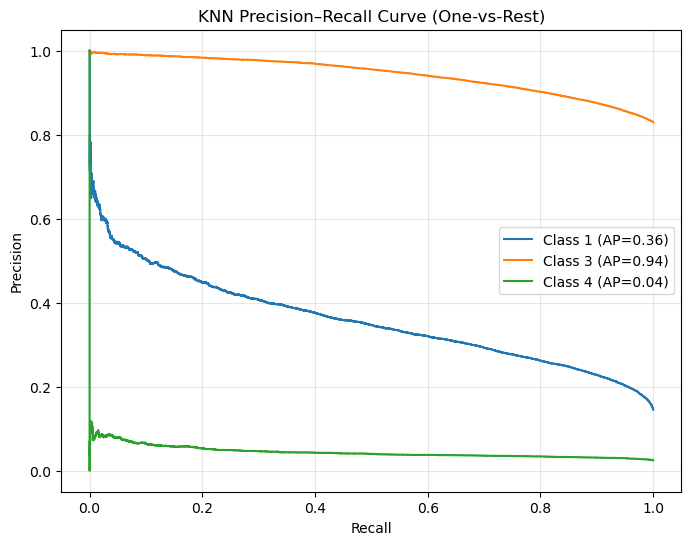

In [16]:
# Plot 3: Precision–Recall Curve (KNN)

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

y_test = knn_bundle["y_test"]
y_proba = knn_bundle["y_proba"]

classes = np.unique(y_test)

plt.figure(figsize=(8,6))

for i, cls in enumerate(classes):
    y_bin = (y_test == cls).astype(int)
    precision, recall, _ = precision_recall_curve(y_bin, y_proba[:, i])
    ap = average_precision_score(y_bin, y_proba[:, i])
    plt.plot(recall, precision, label=f"Class {cls} (AP={ap:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("KNN Precision–Recall Curve (One-vs-Rest)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()




Interpretation: KNN Precision–Recall Curve

This plot shows how well the KNN model distinguishes each class under a one-vs-rest setup. Class 3 stands out with a very strong average precision (AP ≈ 0.94), meaning KNN consistently identifies it with high confidence across different recall levels. Class 1 performs moderately (AP ≈ 0.36), showing that predictions become noisy as recall increases. Class 4, however, collapses almost instantly (AP ≈ 0.04), indicating that KNN struggles heavily with this class. This uneven behavior highlights that KNN is highly sensitive to density differences across the dataset.

### Plot 4: Distance Comparison Plot (p=1 vs p=2)

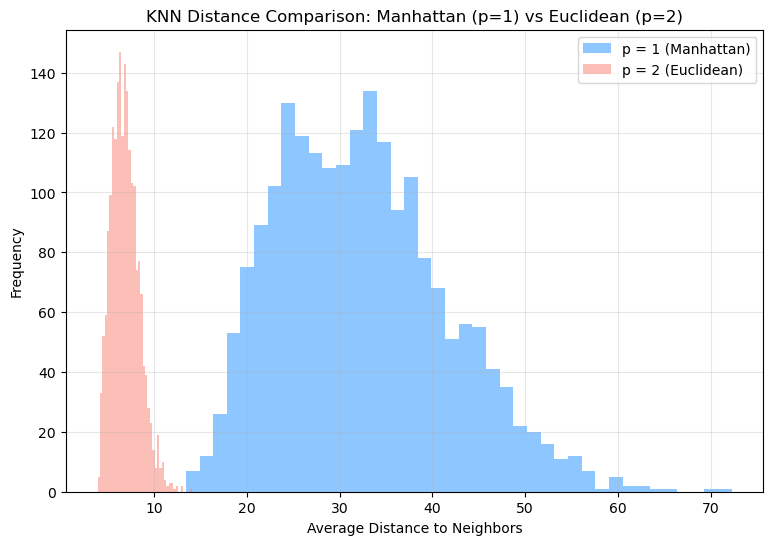

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Load models
knn_p1 = knn_bundle["knn_p1_model"]   # Manhattan
knn_p2 = knn_bundle["knn_p2_model"]   # Euclidean

# Load sample test set
X_sample = knn_bundle["X_test_sample"]

# Compute distances for p=1
dist_p1, _ = knn_p1.kneighbors(X_sample)
avg_dist_p1 = dist_p1.mean(axis=1)

# Compute distances for p=2
dist_p2, _ = knn_p2.kneighbors(X_sample)
avg_dist_p2 = dist_p2.mean(axis=1)

# Plot comparison
plt.figure(figsize=(9,6))
plt.hist(avg_dist_p1, bins=40, alpha=0.5, label="p = 1 (Manhattan)", color="dodgerblue")
plt.hist(avg_dist_p2, bins=40, alpha=0.5, label="p = 2 (Euclidean)", color="salmon")

plt.title("KNN Distance Comparison: Manhattan (p=1) vs Euclidean (p=2)")
plt.xlabel("Average Distance to Neighbors")
plt.ylabel("Frequency")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Interpretation: KNN Distance Comparison (Manhattan vs. Euclidean)

This plot compares the average neighbor distances under Manhattan (p=1) and Euclidean (p=2) metrics. Euclidean distances cluster tightly at much smaller values, meaning points appear closer together in this metric. Manhattan distances spread much wider, showing greater separation between samples. This visualization basically shows how the choice of distance metric reshapes the entire neighborhood structure for KNN.

### Plot 5: KNN Confidence Distribution Plot

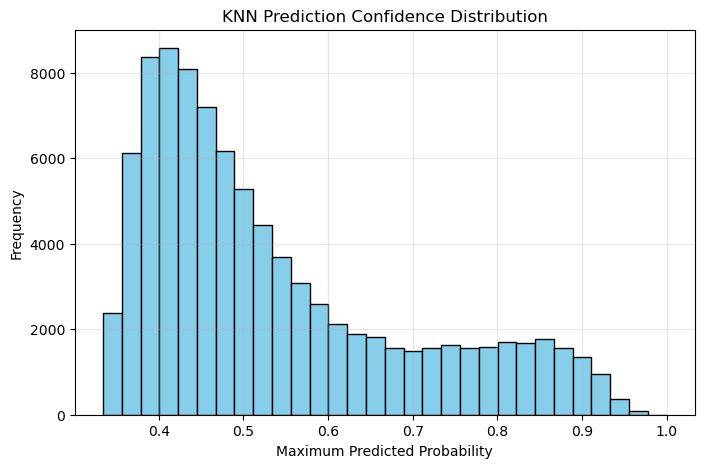

In [27]:
import numpy as np
import matplotlib.pyplot as plt

y_proba = knn_bundle["y_proba"]
max_conf = np.max(y_proba, axis=1)

plt.figure(figsize=(8,5))
plt.hist(max_conf, bins=30, color="skyblue", edgecolor="black")
plt.title("KNN Prediction Confidence Distribution")
plt.xlabel("Maximum Predicted Probability")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


Interpretation: KNN Prediction Confidence Distribution

This plot shows how confident the KNN model is in its predictions by looking at the maximum predicted probability for each sample. Most predictions fall between 0.35 and 0.55, indicating that the model is generally uncertain and rarely makes strong, high-confidence decisions. Only a small fraction of samples reach confidence levels above 0.8, which suggests that the classes overlap heavily in feature space. This distribution underscores why KNN struggles on this dataset, the model often cannot distinguish clear nearest-neighbor patterns, leading to weak decision boundaries and inconsistent classification confidence.